# Capstone Project-5
## Domain:
- Marketing for Financial Services
## Title:
- Exploratory Data Analysis and Predictive Modeling for Marketing Term-Deposit Scheme in the Financial Services Industry
## About:
- DB Bank is a large public sector bank that has branches across the cities. It provides various services like savings accounts, current accounts, term deposits, personal loans, home loans, etc. to customers. Whenever the bank conducts marketing on its new schemes, it will keep track of data related to customers’ personal, social, and economic details. Also, it maintains the detailing of efforts made to achieve success in the campaign. Recently, the bank has conducted a campaign to market its term-deposit scheme. Campaigns were conducted based mostly on direct phone calls, soliciting the bank's customers to place  a term deposit. After all the marketing efforts, if the client had agreed to place a deposit, then the campaign is a success, otherwise not (Target variable marked 'yes', or 'no').

## Importing libraries 

In [1]:
import pandas as pd      # Data manipulation and analysis
import numpy as np       # Mathematical functions and arrays
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns     # Statistical data visualization
import plotly.graph_objects as go   # Interactive plots
import plotly.express as px   # Expressive visualizations
import folium     # Geospatial data visualization

## Importng datasets and data cleanup

In [2]:
Y = pd.read_csv('Customer_Response_data_p1.csv') # the output (Yes/No)
Customer_and_bank_details_p1 = pd.read_csv('Customer_and_bank details_p1.csv')
Customer_campaign_details_p1 = pd.read_csv('Customer_campaign_details_p1.csv')
Customer_Postal_Code_detail = pd.read_csv('Customer_Postal_Code_details.csv')
Customer_social_economic_data_p1 = pd.read_csv('Customer_social_economic_data_p1.csv')
State_Master = pd.read_csv('State_Master.csv')
Region_code_master = pd.read_csv('Region_code_master.csv')
City_Master = pd.read_csv('City_Master.csv')

In [3]:
Customer_and_bank_details_p1.head(3)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2


In [4]:
Customer_and_bank_details_p1.describe()

,Customer_id,age
count,37084.000000,37084.000000
mean,18542.500000,40.042714
std,10705.373028,10.432965
min,1.000000,17.000000
25%,9271.750000,32.000000
50%,18542.500000,38.000000
75%,27813.250000,47.000000
max,37084.000000,98.000000


In [5]:
Customer_and_bank_details_p1.isnull().sum()

Customer_id    0
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
Region_Code    0
State_Code     0
City_Code      0
dtype: int64

In [6]:
Customer_campaign_details_p1.head(3)

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent


In [7]:
Customer_campaign_details_p1.describe()

,Customer_id,duration,campaign,pdays,previous
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,258.237946,2.569545,962.530849,0.172986
std,10705.373028,258.730909,2.770611,186.773063,0.495681
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,9271.750000,102.000000,1.000000,999.000000,0.000000
50%,18542.500000,180.000000,2.000000,999.000000,0.000000
75%,27813.250000,319.250000,3.000000,999.000000,0.000000
max,37084.000000,4918.000000,56.000000,999.000000,7.000000


In [8]:
Customer_campaign_details_p1.isnull().sum()

Customer_id    0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [9]:
Customer_Postal_Code_detail.head(3)

,customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036


In [10]:
Customer_Postal_Code_detail.describe()

,customer_id,Postal Code
count,37084.000000,37084.000000
mean,18542.500000,55202.625553
std,10705.373028,32057.300954
min,1.000000,1040.000000
25%,9271.750000,23223.000000
50%,18542.500000,56301.000000
75%,27813.250000,90008.000000
max,37084.000000,99301.000000


In [11]:
Customer_Postal_Code_detail.isnull().sum()

customer_id    0
Postal Code    0
dtype: int64

In [12]:
Customer_social_economic_data_p1.head(3)

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0


In [13]:
Customer_social_economic_data_p1.describe()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
Customer_social_economic_data_p1.isnull().sum()

Customer_id       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [15]:
data = pd.merge(Customer_and_bank_details_p1,Customer_campaign_details_p1 , on='Customer_id', how='outer')
data

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,telephone,may,mon,307,1,999,0,nonexistent
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,telephone,may,mon,198,1,999,0,nonexistent
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,telephone,may,mon,139,1,999,0,nonexistent
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,telephone,may,mon,217,1,999,0,nonexistent
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,telephone,may,mon,380,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,cellular,nov,fri,442,1,999,0,nonexistent


In [16]:
Customer_Postal_Code_detail = Customer_Postal_Code_detail.rename(columns={'customer_id':'Customer_id'})

In [17]:
data = pd.merge(data,Customer_Postal_Code_detail , on='Customer_id', how='outer')
data.head(3)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,telephone,may,mon,307,1,999,0,nonexistent,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,telephone,may,mon,198,1,999,0,nonexistent,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,telephone,may,mon,139,1,999,0,nonexistent,90036


In [18]:
#Customer_social_economic_data_p1
data = pd.merge(data,Customer_social_economic_data_p1, on='Customer_id', how='outer')
data.head(3)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,campaign,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,...,1,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,1,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,1,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

# Now we have a compound dataframe

In [20]:
df = data
df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,campaign,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,...,1,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,1,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,1,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,1,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,1,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0


In [24]:
df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [26]:
df.shape

(37084, 25)

# Tranformation of datafram form object type to numeric type 

In [55]:
# we want to do the datatype conversion on a second copy so that we dont harm uour previous work
df_copy = df

* we create a list of columns with datatype as object and use 
* lable encoder to find that column form the dataframe to convert it into numeric value 
* Obvouslu we can shorten it but for easier understanding and to have a better documented history i am taking this route 

In [69]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_copy.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [72]:
df_copy.describe()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,campaign,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,...,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,3.724625,1.173255,3.748382,0.207745,1.071837,0.328012,1.575720,17.804498,...,2.569545,962.530849,0.172986,0.930347,55202.625553,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,3.599454,0.607991,2.137036,0.405831,0.985435,0.724336,1.165421,14.660163,...,2.770611,186.773063,0.495681,0.362803,32057.300954,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,7.000000,...,1.000000,999.000000,0.000000,1.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,1.000000,11.000000,...,2.000000,999.000000,0.000000,1.000000,56301.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,3.000000,26.000000,...,3.000000,999.000000,0.000000,1.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,4.000000,48.000000,...,56.000000,999.000000,7.000000,2.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


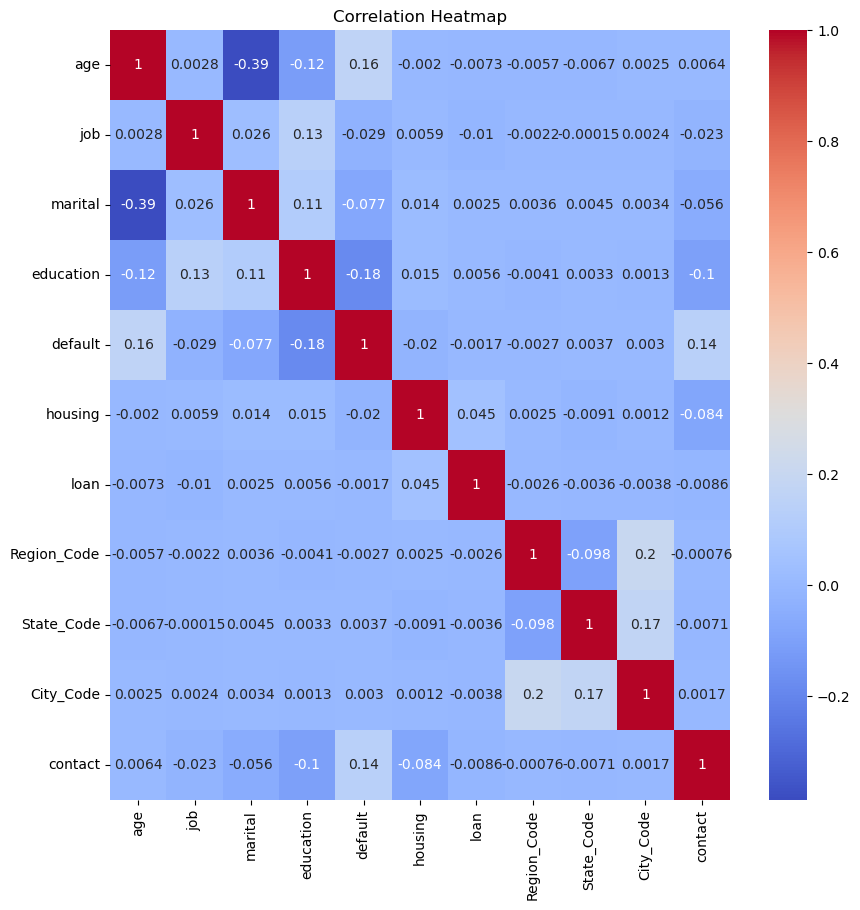

In [94]:
all_columns = df_copy.columns

# Compute the correlation matrix
correlation_matrix = df_copy[all_columns[1:12]].corr()

# Generate the heatmap
num_variables = correlation_matrix.shape[0]
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()